In [1]:
import numpy as np
import glob
import torch
from PIL import Image
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# torch.manual_seed(17)

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "CPU")
print(device)

cuda:0


# Data Loader

In [3]:
class Gender_Dataset(torch.utils.data.Dataset):
    
    def __init__(self, root, transforms=None, target_transforms= None):
        super(Gender_Dataset, self).__init__()
        self.transforms = transforms
        self.target_transforms = target_transforms
        
        # Read Male Data 
        urls = glob.glob(root + '/male/*.jpg')
        labels = np.zeros(len(urls))
        self.urls = urls
        self.targets = labels
        
        # Read Famale Data 
        urls = glob.glob(root + '/female/*.jpg')
        labels = np.ones(len(urls))
        self.urls = self.urls + urls
        self.targets = np.array(list(self.targets) + list(labels), int) # also convert to int
    
    def __len__(self):
        return len(self.urls)
    
    def __getitem__(self, idx):
        image = Image.open(self.urls[idx]).convert("RGB")
        label = self.targets[idx]
        
        image = image.resize((200,200))
        
        if self.transforms:
            image = self.transforms(image)
        
        if self.target_transforms:
            label = self.target_transforms(label)
        
        image = np.array(image)/255.0
        image = image.reshape((3,200,200))
        return image, label

In [4]:
 
data_dir = {"train":"Datasets/Gender_Classification/Train", "test":"Datasets/Gender_Classification/Test"}

train_transform = transforms.Compose([transforms.RandomRotation(45),
#                                       transforms.Resize((200,200))
                                     ])
test_transform = transforms.Compose([transforms.RandomRotation(45),
#                                       transforms.Resize((200,200))
                                     ])
train_data = Gender_Dataset(root=data_dir['train'], transforms=train_transform)
test_data = Gender_Dataset(root=data_dir['test'], transforms=test_transform)

batch_size = 64
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

# Show Sample Data

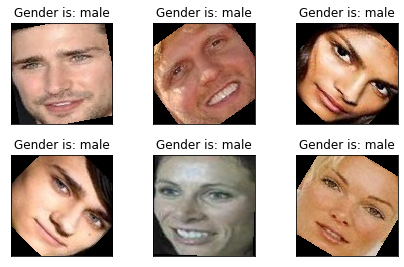

In [5]:
example_data = next(iter(train_dataloader))
images = np.array(example_data[0])
labels = np.array(example_data[1])
fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    plt.imshow(images[i].reshape(200, 200, 3), cmap='gray', interpolation='none')
    plt.title('Gender is: {}'.format("male" if np.argmax(labels[i]) == 0 else "female"))
    plt.xticks([])
    plt.yticks([])

Epoch 1/3  batch 1, train Error :0.6927401423454285, Train Acc:0
Epoch 1/3  batch 2, train Error :0.6772898435592651, Train Acc:0
Epoch 1/3  batch 3, train Error :0.8346205353736877, Train Acc:0
Epoch 1/3  batch 4, train Error :0.7316617369651794, Train Acc:0
Epoch 1/3  batch 5, train Error :0.695199728012085, Train Acc:0
Epoch 1/3  batch 6, train Error :0.698622465133667, Train Acc:0
Epoch 1/3  batch 7, train Error :0.6891176700592041, Train Acc:0
Epoch 1/3  batch 8, train Error :0.6855767965316772, Train Acc:0
Epoch 1/3  batch 9, train Error :0.6771215200424194, Train Acc:0
Epoch 1/3  batch 10, train Error :0.797888457775116, Train Acc:0
Epoch 1/3  batch 11, train Error :0.6934359073638916, Train Acc:0
Epoch 1/3  batch 12, train Error :0.688591480255127, Train Acc:0
Epoch 1/3  batch 13, train Error :0.6914918422698975, Train Acc:0
Epoch 1/3  batch 14, train Error :0.69285649061203, Train Acc:0
Epoch 1/3  batch 15, train Error :0.6941443681716919, Train Acc:0
Epoch 1/3  batch 16, trai

Epoch 1/3  batch 127, train Error :0.6892945766448975, Train Acc:0
Epoch 1/3  batch 128, train Error :0.6944666504859924, Train Acc:0
Epoch 1/3  batch 129, train Error :0.6899715065956116, Train Acc:0
Epoch 1/3  batch 130, train Error :0.6896927356719971, Train Acc:0
Epoch 1/3  batch 131, train Error :0.6879423260688782, Train Acc:0
Epoch 1/3  batch 132, train Error :0.6899224519729614, Train Acc:0
Epoch 1/3  batch 133, train Error :0.6840566396713257, Train Acc:0
Epoch 1/3  batch 134, train Error :0.7007172703742981, Train Acc:0
Epoch 1/3  batch 135, train Error :0.6914381980895996, Train Acc:0
Epoch 1/3  batch 136, train Error :0.6864312291145325, Train Acc:0
Epoch 1/3  batch 137, train Error :0.6970645785331726, Train Acc:0
Epoch 1/3  batch 138, train Error :0.7011384963989258, Train Acc:0
Epoch 1/3  batch 139, train Error :0.6837671995162964, Train Acc:0
Epoch 1/3  batch 140, train Error :0.689099907875061, Train Acc:0
Epoch 1/3  batch 141, train Error :0.7068477272987366, Train Ac

Epoch 1/3  batch 251, train Error :0.6315547227859497, Train Acc:0
Epoch 1/3  batch 252, train Error :0.625893235206604, Train Acc:0
Epoch 1/3  batch 253, train Error :0.6263285279273987, Train Acc:0
Epoch 1/3  batch 254, train Error :0.6442330479621887, Train Acc:0
Epoch 1/3  batch 255, train Error :0.6141270399093628, Train Acc:0
Epoch 1/3  batch 256, train Error :0.6211800575256348, Train Acc:0
Epoch 1/3  batch 257, train Error :0.6176767945289612, Train Acc:0
Epoch 1/3  batch 258, train Error :0.6294043660163879, Train Acc:0
Epoch 1/3  batch 259, train Error :0.6502571702003479, Train Acc:0
Epoch 1/3  batch 260, train Error :0.6092985272407532, Train Acc:0
Epoch 1/3  batch 261, train Error :0.709485650062561, Train Acc:0
Epoch 1/3  batch 262, train Error :0.6098909378051758, Train Acc:0
Epoch 1/3  batch 263, train Error :0.5546566843986511, Train Acc:0
Epoch 1/3  batch 264, train Error :0.54920494556427, Train Acc:0
Epoch 1/3  batch 265, train Error :0.6035275459289551, Train Acc:0

Epoch 1/3  batch 375, train Error :0.6885549426078796, Train Acc:0
Epoch 1/3  batch 376, train Error :0.5364186763763428, Train Acc:0
Epoch 1/3  batch 377, train Error :0.5468279719352722, Train Acc:0
Epoch 1/3  batch 378, train Error :0.6099895238876343, Train Acc:0
Epoch 1/3  batch 379, train Error :0.5150255560874939, Train Acc:0
Epoch 1/3  batch 380, train Error :0.6556428074836731, Train Acc:0
Epoch 1/3  batch 381, train Error :0.6184478998184204, Train Acc:0
Epoch 1/3  batch 382, train Error :0.5930811762809753, Train Acc:0
Epoch 1/3  batch 383, train Error :0.6861101388931274, Train Acc:0
Epoch 1/3  batch 384, train Error :0.5750729441642761, Train Acc:0
Epoch 1/3  batch 385, train Error :0.6470749378204346, Train Acc:0
Epoch 1/3  batch 386, train Error :0.6057363152503967, Train Acc:0
Epoch 1/3  batch 387, train Error :0.5908169150352478, Train Acc:0
Epoch 1/3  batch 388, train Error :0.6320064067840576, Train Acc:0
Epoch 1/3  batch 389, train Error :0.6249352693557739, Train A

Epoch 1/3  batch 499, train Error :0.6496395468711853, Train Acc:0
Epoch 1/3  batch 500, train Error :0.4904719293117523, Train Acc:0
Epoch 1/3  batch 501, train Error :0.6046926379203796, Train Acc:0
Epoch 1/3  batch 502, train Error :0.5506000518798828, Train Acc:0
Epoch 1/3  batch 503, train Error :0.5789692997932434, Train Acc:0
Epoch 1/3  batch 504, train Error :0.6551072001457214, Train Acc:0
Epoch 1/3  batch 505, train Error :0.5734773874282837, Train Acc:0
Epoch 1/3  batch 506, train Error :0.6842978596687317, Train Acc:0
Epoch 1/3  batch 507, train Error :0.5392930507659912, Train Acc:0
Epoch 1/3  batch 508, train Error :0.6058326363563538, Train Acc:0
Epoch 1/3  batch 509, train Error :0.8448349237442017, Train Acc:0
Epoch 1/3  batch 510, train Error :0.5963590741157532, Train Acc:0
Epoch 1/3  batch 511, train Error :0.6152496933937073, Train Acc:0
Epoch 1/3  batch 512, train Error :0.6308263540267944, Train Acc:0
Epoch 1/3  batch 513, train Error :0.573394238948822, Train Ac

Epoch 1/3  batch 623, train Error :0.5637486577033997, Train Acc:0
Epoch 1/3  batch 624, train Error :0.592385470867157, Train Acc:0
Epoch 1/3  batch 625, train Error :0.6017144322395325, Train Acc:0
Epoch 1/3  batch 626, train Error :0.6171565651893616, Train Acc:0
Epoch 1/3  batch 627, train Error :0.5818796157836914, Train Acc:0
Epoch 1/3  batch 628, train Error :0.4794827103614807, Train Acc:0
Epoch 1/3  batch 629, train Error :0.5295770764350891, Train Acc:0
Epoch 1/3  batch 630, train Error :0.5104730725288391, Train Acc:0
Epoch 1/3  batch 631, train Error :0.6995202302932739, Train Acc:0
Epoch 1/3  batch 632, train Error :0.5332944989204407, Train Acc:0
Epoch 1/3  batch 633, train Error :0.6331362724304199, Train Acc:0
Epoch 1/3  batch 634, train Error :0.5285829901695251, Train Acc:0
Epoch 1/3  batch 635, train Error :0.504857063293457, Train Acc:0
Epoch 1/3  batch 636, train Error :0.6780701279640198, Train Acc:0
Epoch 1/3  batch 637, train Error :0.5575441122055054, Train Acc

Epoch 2/3  batch 11, train Error :0.5311415195465088, Train Acc:0
Epoch 2/3  batch 12, train Error :0.6402912735939026, Train Acc:0
Epoch 2/3  batch 13, train Error :0.6069536209106445, Train Acc:0
Epoch 2/3  batch 14, train Error :0.6461150050163269, Train Acc:0
Epoch 2/3  batch 15, train Error :0.524692177772522, Train Acc:0
Epoch 2/3  batch 16, train Error :0.516214907169342, Train Acc:0
Epoch 2/3  batch 17, train Error :0.5742142200469971, Train Acc:0
Epoch 2/3  batch 18, train Error :0.5536207556724548, Train Acc:0
Epoch 2/3  batch 19, train Error :0.5766563415527344, Train Acc:0
Epoch 2/3  batch 20, train Error :0.5554512739181519, Train Acc:0
Epoch 2/3  batch 21, train Error :0.537168562412262, Train Acc:0
Epoch 2/3  batch 22, train Error :0.5034067034721375, Train Acc:0
Epoch 2/3  batch 23, train Error :0.7039680480957031, Train Acc:0
Epoch 2/3  batch 24, train Error :0.5571691989898682, Train Acc:0
Epoch 2/3  batch 25, train Error :0.597077488899231, Train Acc:0
Epoch 2/3  bat

Epoch 2/3  batch 135, train Error :0.5733243227005005, Train Acc:0
Epoch 2/3  batch 136, train Error :0.5780876278877258, Train Acc:0
Epoch 2/3  batch 137, train Error :0.44985514879226685, Train Acc:0
Epoch 2/3  batch 138, train Error :0.5725285410881042, Train Acc:0
Epoch 2/3  batch 139, train Error :0.5994573831558228, Train Acc:0
Epoch 2/3  batch 140, train Error :0.5124576091766357, Train Acc:0
Epoch 2/3  batch 141, train Error :0.6795174479484558, Train Acc:0
Epoch 2/3  batch 142, train Error :0.6077170968055725, Train Acc:0
Epoch 2/3  batch 143, train Error :0.6333577036857605, Train Acc:0
Epoch 2/3  batch 144, train Error :0.578233003616333, Train Acc:0
Epoch 2/3  batch 145, train Error :0.5247371196746826, Train Acc:0
Epoch 2/3  batch 146, train Error :0.5875455141067505, Train Acc:0
Epoch 2/3  batch 147, train Error :0.552704393863678, Train Acc:0
Epoch 2/3  batch 148, train Error :0.5908976793289185, Train Acc:0
Epoch 2/3  batch 149, train Error :0.64720618724823, Train Acc:

Epoch 2/3  batch 259, train Error :0.5348993539810181, Train Acc:0
Epoch 2/3  batch 260, train Error :0.5754331350326538, Train Acc:0
Epoch 2/3  batch 261, train Error :0.5869337320327759, Train Acc:0
Epoch 2/3  batch 262, train Error :0.5900033712387085, Train Acc:0
Epoch 2/3  batch 263, train Error :0.5365488529205322, Train Acc:0
Epoch 2/3  batch 264, train Error :0.49809008836746216, Train Acc:0
Epoch 2/3  batch 265, train Error :0.5642572045326233, Train Acc:0
Epoch 2/3  batch 266, train Error :0.6596166491508484, Train Acc:0
Epoch 2/3  batch 267, train Error :0.5601914525032043, Train Acc:0
Epoch 2/3  batch 268, train Error :0.5664905905723572, Train Acc:0
Epoch 2/3  batch 269, train Error :0.6400709748268127, Train Acc:0
Epoch 2/3  batch 270, train Error :0.5849695205688477, Train Acc:0
Epoch 2/3  batch 271, train Error :0.656201183795929, Train Acc:0
Epoch 2/3  batch 272, train Error :0.5871346592903137, Train Acc:0
Epoch 2/3  batch 273, train Error :0.5824849009513855, Train A

Epoch 2/3  batch 383, train Error :0.666975736618042, Train Acc:0
Epoch 2/3  batch 384, train Error :0.6064258217811584, Train Acc:0
Epoch 2/3  batch 385, train Error :0.5781364440917969, Train Acc:0
Epoch 2/3  batch 386, train Error :0.5946207642555237, Train Acc:0
Epoch 2/3  batch 387, train Error :0.5549529194831848, Train Acc:0
Epoch 2/3  batch 388, train Error :0.6006764769554138, Train Acc:0
Epoch 2/3  batch 389, train Error :0.6362935900688171, Train Acc:0
Epoch 2/3  batch 390, train Error :0.6201973557472229, Train Acc:0
Epoch 2/3  batch 391, train Error :0.6325964331626892, Train Acc:0
Epoch 2/3  batch 392, train Error :0.5505384802818298, Train Acc:0
Epoch 2/3  batch 393, train Error :0.5641239285469055, Train Acc:0
Epoch 2/3  batch 394, train Error :0.48074576258659363, Train Acc:0
Epoch 2/3  batch 395, train Error :0.6271951198577881, Train Acc:0
Epoch 2/3  batch 396, train Error :0.5858588814735413, Train Acc:0
Epoch 2/3  batch 397, train Error :0.5166717171669006, Train A

Epoch 2/3  batch 507, train Error :0.6967898607254028, Train Acc:0
Epoch 2/3  batch 508, train Error :0.5640847086906433, Train Acc:0
Epoch 2/3  batch 509, train Error :0.5396295189857483, Train Acc:0
Epoch 2/3  batch 510, train Error :0.5589137077331543, Train Acc:0
Epoch 2/3  batch 511, train Error :0.6588650941848755, Train Acc:0
Epoch 2/3  batch 512, train Error :0.7342543005943298, Train Acc:0
Epoch 2/3  batch 513, train Error :0.6383200883865356, Train Acc:0
Epoch 2/3  batch 514, train Error :0.5781830549240112, Train Acc:0
Epoch 2/3  batch 515, train Error :0.5781439542770386, Train Acc:0
Epoch 2/3  batch 516, train Error :0.5763956904411316, Train Acc:0
Epoch 2/3  batch 517, train Error :0.6113074421882629, Train Acc:0
Epoch 2/3  batch 518, train Error :0.5540635585784912, Train Acc:0
Epoch 2/3  batch 519, train Error :0.5869124531745911, Train Acc:0
Epoch 2/3  batch 520, train Error :0.597652018070221, Train Acc:0
Epoch 2/3  batch 521, train Error :0.5440039038658142, Train Ac

Epoch 2/3  batch 631, train Error :0.5162876844406128, Train Acc:0
Epoch 2/3  batch 632, train Error :0.6269309520721436, Train Acc:0
Epoch 2/3  batch 633, train Error :0.5463781356811523, Train Acc:0
Epoch 2/3  batch 634, train Error :0.5952275395393372, Train Acc:0
Epoch 2/3  batch 635, train Error :0.5839547514915466, Train Acc:0
Epoch 2/3  batch 636, train Error :0.5780515670776367, Train Acc:0
Epoch 2/3  batch 637, train Error :0.5912919044494629, Train Acc:0
Epoch 2/3  batch 638, train Error :0.5645079016685486, Train Acc:0
Epoch 2/3  batch 639, train Error :0.5675719380378723, Train Acc:0
Epoch 2/3  batch 640, train Error :0.5140621066093445, Train Acc:0
Epoch 2/3  batch 641, train Error :0.5915027856826782, Train Acc:0
Epoch 2/3  batch 642, train Error :0.5661046504974365, Train Acc:0
Epoch 2/3  batch 643, train Error :0.6063817739486694, Train Acc:0
Epoch 2/3  batch 644, train Error :0.5263946652412415, Train Acc:0
Epoch 2/3  batch 645, train Error :0.580081045627594, Train Ac

Epoch 3/3  batch 19, train Error :0.6184587478637695, Train Acc:0
Epoch 3/3  batch 20, train Error :0.5836902260780334, Train Acc:0
Epoch 3/3  batch 21, train Error :0.5395771265029907, Train Acc:0
Epoch 3/3  batch 22, train Error :0.5010966062545776, Train Acc:0
Epoch 3/3  batch 23, train Error :0.5833784341812134, Train Acc:0
Epoch 3/3  batch 24, train Error :0.5854308009147644, Train Acc:0
Epoch 3/3  batch 25, train Error :0.5055829286575317, Train Acc:0
Epoch 3/3  batch 26, train Error :0.6480915546417236, Train Acc:0
Epoch 3/3  batch 27, train Error :0.6745897531509399, Train Acc:0
Epoch 3/3  batch 28, train Error :0.5484284162521362, Train Acc:0
Epoch 3/3  batch 29, train Error :0.5654762387275696, Train Acc:0
Epoch 3/3  batch 30, train Error :0.4837796688079834, Train Acc:0
Epoch 3/3  batch 31, train Error :0.5323445796966553, Train Acc:0
Epoch 3/3  batch 32, train Error :0.5084900259971619, Train Acc:0
Epoch 3/3  batch 33, train Error :0.6258219480514526, Train Acc:0
Epoch 3/3 

Epoch 3/3  batch 143, train Error :0.4057765007019043, Train Acc:0
Epoch 3/3  batch 144, train Error :0.4081968665122986, Train Acc:0
Epoch 3/3  batch 145, train Error :0.4560854136943817, Train Acc:0
Epoch 3/3  batch 146, train Error :0.5778272151947021, Train Acc:0
Epoch 3/3  batch 147, train Error :0.6296889781951904, Train Acc:0
Epoch 3/3  batch 148, train Error :0.5887977480888367, Train Acc:0
Epoch 3/3  batch 149, train Error :0.4892476797103882, Train Acc:0
Epoch 3/3  batch 150, train Error :0.6404794454574585, Train Acc:0
Epoch 3/3  batch 151, train Error :0.5247955918312073, Train Acc:0
Epoch 3/3  batch 152, train Error :0.6686000227928162, Train Acc:0
Epoch 3/3  batch 153, train Error :0.5157036781311035, Train Acc:0
Epoch 3/3  batch 154, train Error :0.572207510471344, Train Acc:0
Epoch 3/3  batch 155, train Error :0.5839565396308899, Train Acc:0
Epoch 3/3  batch 156, train Error :0.5906922221183777, Train Acc:0
Epoch 3/3  batch 157, train Error :0.5214650630950928, Train Ac

Epoch 3/3  batch 267, train Error :0.547642171382904, Train Acc:0
Epoch 3/3  batch 268, train Error :0.5908616185188293, Train Acc:0
Epoch 3/3  batch 269, train Error :0.4996449053287506, Train Acc:0
Epoch 3/3  batch 270, train Error :0.5088287591934204, Train Acc:0
Epoch 3/3  batch 271, train Error :0.5210704803466797, Train Acc:0
Epoch 3/3  batch 272, train Error :0.5154641270637512, Train Acc:0
Epoch 3/3  batch 273, train Error :0.48862648010253906, Train Acc:0
Epoch 3/3  batch 274, train Error :0.6604793667793274, Train Acc:0
Epoch 3/3  batch 275, train Error :0.5884451866149902, Train Acc:0
Epoch 3/3  batch 276, train Error :0.6259545087814331, Train Acc:0
Epoch 3/3  batch 277, train Error :0.4248929023742676, Train Acc:0
Epoch 3/3  batch 278, train Error :0.5853036642074585, Train Acc:0
Epoch 3/3  batch 279, train Error :0.8439961671829224, Train Acc:0
Epoch 3/3  batch 280, train Error :0.7229648232460022, Train Acc:0
Epoch 3/3  batch 281, train Error :0.47302696108818054, Train 

Epoch 3/3  batch 391, train Error :0.5428022146224976, Train Acc:0
Epoch 3/3  batch 392, train Error :0.46754562854766846, Train Acc:0
Epoch 3/3  batch 393, train Error :0.44452428817749023, Train Acc:0
Epoch 3/3  batch 394, train Error :0.6299597024917603, Train Acc:0
Epoch 3/3  batch 395, train Error :0.5250531435012817, Train Acc:0
Epoch 3/3  batch 396, train Error :0.44087064266204834, Train Acc:0
Epoch 3/3  batch 397, train Error :0.5567376613616943, Train Acc:0
Epoch 3/3  batch 398, train Error :0.5393725037574768, Train Acc:0
Epoch 3/3  batch 399, train Error :0.5471342206001282, Train Acc:0
Epoch 3/3  batch 400, train Error :0.6104510426521301, Train Acc:0
Epoch 3/3  batch 401, train Error :0.5451456904411316, Train Acc:0
Epoch 3/3  batch 402, train Error :0.4499337077140808, Train Acc:0
Epoch 3/3  batch 403, train Error :0.4188815951347351, Train Acc:0
Epoch 3/3  batch 404, train Error :0.5476117134094238, Train Acc:0
Epoch 3/3  batch 405, train Error :0.5512794852256775, Trai

Epoch 3/3  batch 515, train Error :0.6078067421913147, Train Acc:0
Epoch 3/3  batch 516, train Error :0.5978050231933594, Train Acc:0
Epoch 3/3  batch 517, train Error :0.738271176815033, Train Acc:0
Epoch 3/3  batch 518, train Error :0.562969446182251, Train Acc:0
Epoch 3/3  batch 519, train Error :0.5266940593719482, Train Acc:0
Epoch 3/3  batch 520, train Error :0.4773431122303009, Train Acc:0
Epoch 3/3  batch 521, train Error :0.5942959785461426, Train Acc:0
Epoch 3/3  batch 522, train Error :0.6257771849632263, Train Acc:0
Epoch 3/3  batch 523, train Error :0.5261534452438354, Train Acc:0
Epoch 3/3  batch 524, train Error :0.5509855151176453, Train Acc:0
Epoch 3/3  batch 525, train Error :0.6465796828269958, Train Acc:0
Epoch 3/3  batch 526, train Error :0.5510314702987671, Train Acc:0
Epoch 3/3  batch 527, train Error :0.49396759271621704, Train Acc:0
Epoch 3/3  batch 528, train Error :0.5578871369361877, Train Acc:0
Epoch 3/3  batch 529, train Error :0.49067750573158264, Train A

Epoch 3/3  batch 639, train Error :0.4360147714614868, Train Acc:0
Epoch 3/3  batch 640, train Error :0.5833470225334167, Train Acc:0
Epoch 3/3  batch 641, train Error :0.5455237627029419, Train Acc:0
Epoch 3/3  batch 642, train Error :0.5217594504356384, Train Acc:0
Epoch 3/3  batch 643, train Error :0.4966650903224945, Train Acc:0
Epoch 3/3  batch 644, train Error :0.5370798110961914, Train Acc:0
Epoch 3/3  batch 645, train Error :0.6806602478027344, Train Acc:0
Epoch 3/3  batch 646, train Error :0.5437472462654114, Train Acc:0
Epoch 3/3  batch 647, train Error :0.6814759969711304, Train Acc:0
Epoch 3/3  batch 648, train Error :0.5537220239639282, Train Acc:0
Epoch 3/3  batch 649, train Error :0.5370299220085144, Train Acc:0
Epoch 3/3  batch 650, train Error :0.5649197697639465, Train Acc:0
Epoch 3/3  batch 651, train Error :0.6308691501617432, Train Acc:0
Epoch 3/3  batch 652, train Error :0.5748314261436462, Train Acc:0
Epoch 3/3  batch 653, train Error :0.4645218849182129, Train A

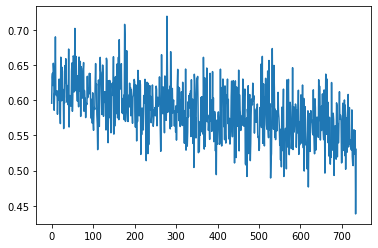

In [10]:
class Gender(nn.Module):
    
    def __init__(self):
        super(Gender, self).__init__()
        self.number_class = 1
        self.lr = 0.001
        
        self.conv1 = nn.Conv2d(3, 20, kernel_size=3)
        self.BN1 = nn.BatchNorm2d(20,20)
        self.conv2 = nn.Conv2d(20, 40, kernel_size=3)
        self.BN2 = nn.BatchNorm2d(40,40)
        self.conv3 = nn.Conv2d(40, 60, kernel_size=3)
        self.BN3 = nn.BatchNorm2d(60,60)
        self.conv4 = nn.Conv2d(60, 128, kernel_size=3)
        self.BN4 = nn.BatchNorm2d(128,128)
        self.fc1 = nn.Linear(128*10*10, 64)
        self.BN5 = nn.BatchNorm2d(128*10*10,128*10*10)
        self.fc2 = nn.Linear(64, 32)
        self.BN6 = nn.BatchNorm2d(32,32)
        self.fc3 = nn.Linear(32, 2)
        self.softMax = nn.LogSoftmax(dim=1)
        
    
    def forward(self, X):
        # Layer 1 
        X = self.conv1(X)
        X = F.max_pool2d(X, kernel_size=2)
        X = F.relu(X)
#         X = self.BN1(X)
        
        # Layer 2
        X = self.conv2(X)
        X = F.max_pool2d(X, kernel_size=2)
        X = F.relu(X)
#         X = self.BN2(X)
        
        # Layer 3
        X = self.conv3(X)
        X = F.max_pool2d(X, kernel_size=2)
        X = F.relu(X)
#         X = self.BN3(X)
        
        # Layer 4
        X = self.conv4(X)
        X = F.max_pool2d(X, kernel_size=2)
        X = F.relu(X)
#         X = self.BN4(X)
        
        # Convert to Vector
        X = X.view(X.size(0), -1)
        
        X = self.fc1(X)
        X = nn.Dropout(p=0.2)(X)
        X = F.relu(X)
#         X = self.BN5(X)
        
        X = self.fc2(X)
        X = nn.Dropout(p=0.2)(X)
        X = F.relu(X)
#         X = self.BN6(X)
        
        X = self.fc3(X)
        X = self.softMax(X)
        
        return X

def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.softmax(y_pred, dim=1))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

def train_model(dataloader, epochs=0, verbos=False):
    steps = 0
    epoch_loss= []

    for epoch in range(epochs):
        model.train()
        loss_list = []
#         i=0
        for batch_index, (data, target) in enumerate(dataloader):
            data, target = data.to('cuda'), target.to('cuda')
#             print(target.unsqueeze(1))
            steps += 1
#             model.n
            optimizer.zero_grad()
            output = model(data.float())
            loss = loss_function(output, target)
#             acc = binary_acc(output, target.unsqueeze(1))
            acc = 0
            loss.backward()
            optimizer.step()
            loss_list.append(loss.item())
            if verbos:
                print("Epoch {}/{}  batch {}, train Error :{}, Train Acc:{}".format(epoch+1,
                                                                                  epochs,
                                                                                  batch_index+1,
                                                                                  loss,
                                                                                   acc))
#             i+=1
#             if i>10:
#                 break
        epoch_loss.append(loss_list)
    return epoch_loss
#                 model(data.float())
#                 print(data.shape)

    
model = Gender()
model.to(device)
# optimizer = optim.Adam(model.parameters(), lr=0.03)
# loss_function = nn.MSELoss()
loss_function = nn.NLLLoss()
learning_rate = 0.003
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

error_lists = train_model(train_dataloader, epochs=3, verbos=True)
plt.plot(np.mean(error_lists, axis=0))

# for parameter in model.parameters():
#     print(parameter[0])


